In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as plt

In [2]:
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv("./Stromerzeuger_east_data.csv", delimiter = ';')

In [4]:
df['Betriebs-Status'].unique() #'In operation', 'In planning', 'Finally decommissioned','Temporarily suspended'

array(['In Betrieb', 'In Planung', 'Endgültig stillgelegt',
       'Vorübergehend stillgelegt'], dtype=object)

In [5]:
df.dropna(axis=1, how='all', inplace = True) #removing columns where everything is NA

In [6]:
df= df[df['Betriebs-Status']=='In Betrieb'] #selecting only operational PV

In [7]:
df.isnull().sum() #sum of all NA values

MaStR-Nr. der Einheit                        0
Anzeige-Name der Einheit                     0
Betriebs-Status                              0
Energieträger                                0
Bruttoleistung der Einheit                   0
Nettonennleistung der Einheit                0
Inbetriebnahmedatum der Einheit              0
Registrierungsdatum der Einheit              0
Bundesland                                   0
Postleitzahl                                 0
Ort                                          0
Straße                                    1156
Hausnummer                                1427
Gemarkung                                 2129
Flurstück                                 2116
Gemeindeschlüssel                            0
Koordinate: Breitengrad (WGS84)            465
Koordinate: Längengrad (WGS84)             465
Anzahl der Solar-Module                     23
Hauptausrichtung der Solar-Module           36
Lage der Einheit                             0
Letzte Aktual

In [8]:
#dropping complete NA columns
df.drop(labels = ['Datum der endgültigen Stilllegung','Datum der geplanten Inbetriebnahme'], axis =1 )

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,Ort,Straße,Hausnummer,Gemarkung,Flurstück,Gemeindeschlüssel,Koordinate: Breitengrad (WGS84),Koordinate: Längengrad (WGS84),Anzahl der Solar-Module,Hauptausrichtung der Solar-Module,Lage der Einheit,Letzte Aktualisierung,Name des Anlagenbetreibers (nur Org.),\tMaStR-Nr. des Anlagenbetreibers,Volleinspeisung oder Teileinspeisung,MaStR-Nr. der Genehmigung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung)
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,NaN,NaN,14522360,"50,986","12,956",1250.0,Süd,Freifläche,5/28/2019,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5",NaN
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,Salzatal,Am Schauchenberg,3,NaN,NaN,15088319,"51,486613","11,802551",4608.0,Süd-West,Freifläche,5/9/2022,Auer Solar,ABR973713974770,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4",NaN
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,Hecklingen,Staßfurter Straße,4,NaN,NaN,15089175,"51,852","11,544",2436.0,Süd,Freifläche,4/21/2020,Pro Solar Infrastrukturgesellschaft mbH,ABR928650895732,Volleinspeisung,NaN,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06",NaN
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,NaN,NaN,14522360,"50,986","12,956",1250.0,Süd,Freifläche,5/28/2019,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5",NaN
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,Elsteraue,Dr.-Pier-Straße,NaN,NaN,NaN,15084130,"51,068775","12,205957",9996.0,Süd,Freifläche,1/27/2022,Solarpark Elsteraue GmbH & Co. KG,ABR948985124215,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,"0,3","0,3",11/13/2022,11/13/2022,Sachsen,2708,Niedercunnersdorf,NaN,NaN,NaN,NaN,14626245,NaN,NaN,1.0,Süd,Freifläche,11/13/2022,natürliche Person (ABR938944554306),ABR938944554306,Teileinspeisung (einschließlich Eigenverbrauch),NaN,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,"0,3",NaN
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/14/2022,11/14/2022,Sachsen,4827,Machern,NaN,NaN,NaN,NaN,14729250,NaN,NaN,2.0,Süd-Ost,Freifläche,11/14/2022,natürliche Person (ABR957640952100),AB

In [9]:
#dropping columns with >2000 NA vals
df.drop(labels = ["Gemarkung","Flurstück","MaStR-Nr. der Genehmigung" , "Zuschlagnummer (EEG/KWK-Ausschreibung)"], axis =1 )

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,Ort,Straße,Hausnummer,Gemeindeschlüssel,Koordinate: Breitengrad (WGS84),Koordinate: Längengrad (WGS84),Anzahl der Solar-Module,Hauptausrichtung der Solar-Module,Lage der Einheit,Letzte Aktualisierung,Datum der endgültigen Stilllegung,Datum der geplanten Inbetriebnahme,Name des Anlagenbetreibers (nur Org.),\tMaStR-Nr. des Anlagenbetreibers,Volleinspeisung oder Teileinspeisung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,14522360,"50,986","12,956",1250.0,Süd,Freifläche,5/28/2019,NaN,NaN,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5"
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,Salzatal,Am Schauchenberg,3,15088319,"51,486613","11,802551",4608.0,Süd-West,Freifläche,5/9/2022,NaN,NaN,Auer Solar,ABR973713974770,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4"
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,Hecklingen,Staßfurter Straße,4,15089175,"51,852","11,544",2436.0,Süd,Freifläche,4/21/2020,NaN,NaN,Pro Solar Infrastrukturgesellschaft mbH,ABR928650895732,Volleinspeisung,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06"
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,14522360,"50,986","12,956",1250.0,Süd,Freifläche,5/28/2019,NaN,NaN,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5"
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,Elsteraue,Dr.-Pier-Straße,NaN,15084130,"51,068775","12,205957",9996.0,Süd,Freifläche,1/27/2022,NaN,NaN,Solarpark Elsteraue GmbH & Co. KG,ABR948985124215,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,"0,3","0,3",11/13/2022,11/13/2022,Sachsen,2708,Niedercunnersdorf,NaN,NaN,14626245,NaN,NaN,1.0,Süd,Freifläche,11/13/2022,NaN,NaN,natürliche Person (ABR938944554306),ABR938944554306,Teileinspeisung (einschließlich Eigenverbrauch),SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,"0,3"
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/14/2022,11/14/2022,Sachsen,4827,Machern,NaN,NaN,14729250,NaN,NaN,2.0,Süd-Ost,Freifläche,11/14/2022,NaN,NaN,natürliche Person (ABR957640952100),ABR957640952100,Teileinspeisung (einschließlich Eigenverbrauch),Mitteldeut

In [18]:
# 1st elimination of NA coordinates. 
#Substituting same coordinates for same postleitzahl using groupby

x= df.sort_values(by= 'Postleitzahl')
grouped= x.groupby(["Postleitzahl"],  as_index=False)
x= grouped.apply(lambda x: x.fillna(method='ffill'))

print("Before", df['Koordinate: Breitengrad (WGS84)'].isnull().sum())
print("After", x['Koordinate: Breitengrad (WGS84)'].isnull().sum())

Before 465
After 247


In [19]:
#Total number of unique Postleitzahl for NA coordinates
y= x[x['Koordinate: Breitengrad (WGS84)'].isna()]
len(y['Postleitzahl'].unique())

183

In [20]:
#Used the list of postleitzahl on https://www.koordinatengps.de/ to find the coordinates
missing_coordinates = pd.read_csv("missing_coordinates.csv")

In [21]:
missing_coordinates

,Postleitzahl,Koordinate: Breitengrad (WGS84),Koordinate: Längengrad (WGS84)
0,8267,50.353831,12.410931
1,9465,50.497891,12.983633
2,9496,50.600944,13.186667
3,9548,50.633111,13.471468
4,8297,50.642367,12.823421
5,8134,50.651542,12.596454
6,9429,50.656641,13.075264
7,9526,50.672163,13.344048
8,9419,50.676286,12.958397
9,9392,50.688066,12.911777


In [26]:
#2nd elimation of NA coordinates
#mapping the postleitzahl in  primary database with missing coordinate database to fill NA
x['Koordinate: Längengrad (WGS84)'] = x['Koordinate: Längengrad (WGS84)'].where(x['Koordinate: Längengrad (WGS84)'].notnull(), x['Postleitzahl'].map(missing_coordinates.set_index('Postleitzahl')['Koordinate: Längengrad (WGS84)']))
x['Koordinate: Breitengrad (WGS84)'] = x['Koordinate: Breitengrad (WGS84)'].where(x['Koordinate: Breitengrad (WGS84)'].notnull(), x['Postleitzahl'].map(missing_coordinates.set_index('Postleitzahl')['Koordinate: Breitengrad (WGS84)']))

#Substituting same coordinates for same postleitzahl using groupby
x= x.sort_values(by= 'Postleitzahl')
grouped= x.groupby(["Postleitzahl"],  as_index=False)
x= grouped.apply(lambda x: x.fillna(method='ffill'))
print("After", x['Koordinate: Breitengrad (WGS84)'].isnull().sum())


After 68


In [27]:
df=x

In [59]:
latdf= df[df['Koordinate: Breitengrad (WGS84)'].notnull()]

In [60]:
latdf['Koordinate: Breitengrad (WGS84)'] = latdf['Koordinate: Breitengrad (WGS84)'].astype("string")
latdf['Koordinate: Längengrad (WGS84)'] = latdf['Koordinate: Längengrad (WGS84)'].astype("string")

<ipython-input-60-a83d6e59c758>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latdf['Koordinate: Breitengrad (WGS84)'] = latdf['Koordinate: Breitengrad (WGS84)'].astype("string")
<ipython-input-60-a83d6e59c758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latdf['Koordinate: Längengrad (WGS84)'] = latdf['Koordinate: Längengrad (WGS84)'].astype("string")


In [61]:
latdf['Koordinate: Breitengrad (WGS84)'] = latdf['Koordinate: Breitengrad (WGS84)'].str.replace(',', '.')
latdf['Koordinate: Längengrad (WGS84)'] = latdf['Koordinate: Längengrad (WGS84)'].str.replace(',', '.')
latdf['Koordinate: Breitengrad (WGS84)'] = latdf['Koordinate: Breitengrad (WGS84)'].astype("float64")
latdf['Koordinate: Längengrad (WGS84)'] = latdf['Koordinate: Längengrad (WGS84)'].astype("float64")
latdf = latdf.rename(columns={'Koordinate: Breitengrad (WGS84)': 'latitude', 'Koordinate: Längengrad (WGS84)': 'longitude'})

<ipython-input-61-b98935e54b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latdf['Koordinate: Breitengrad (WGS84)'] = latdf['Koordinate: Breitengrad (WGS84)'].str.replace(',', '.')
<ipython-input-61-b98935e54b9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latdf['Koordinate: Längengrad (WGS84)'] = latdf['Koordinate: Längengrad (WGS84)'].str.replace(',', '.')
<ipython-input-61-b98935e54b9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [65]:
gdf_pv = gpd.GeoDataFrame(latdf, geometry=gpd.points_from_xy(latdf.longitude, latdf.latitude, crs="epsg:4326"))

In [66]:
gdf_pv.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
""" 
#used in this notebook 
1. level-0 | Country
 2. level-1 | State
 3. level-2 | Admistrative regions
 4. level-3 | districts
 https://data.biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip"""

' \n#used in this notebook \n1. level-0 | Country\n 2. level-1 | State\n 3. level-2 | Admistrative regions\n 4. level-3 | districts\n https://data.biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip'

In [77]:
germany = gpd.read_file("./DEU_adm/DEU_adm1.shp")

In [78]:
germany.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

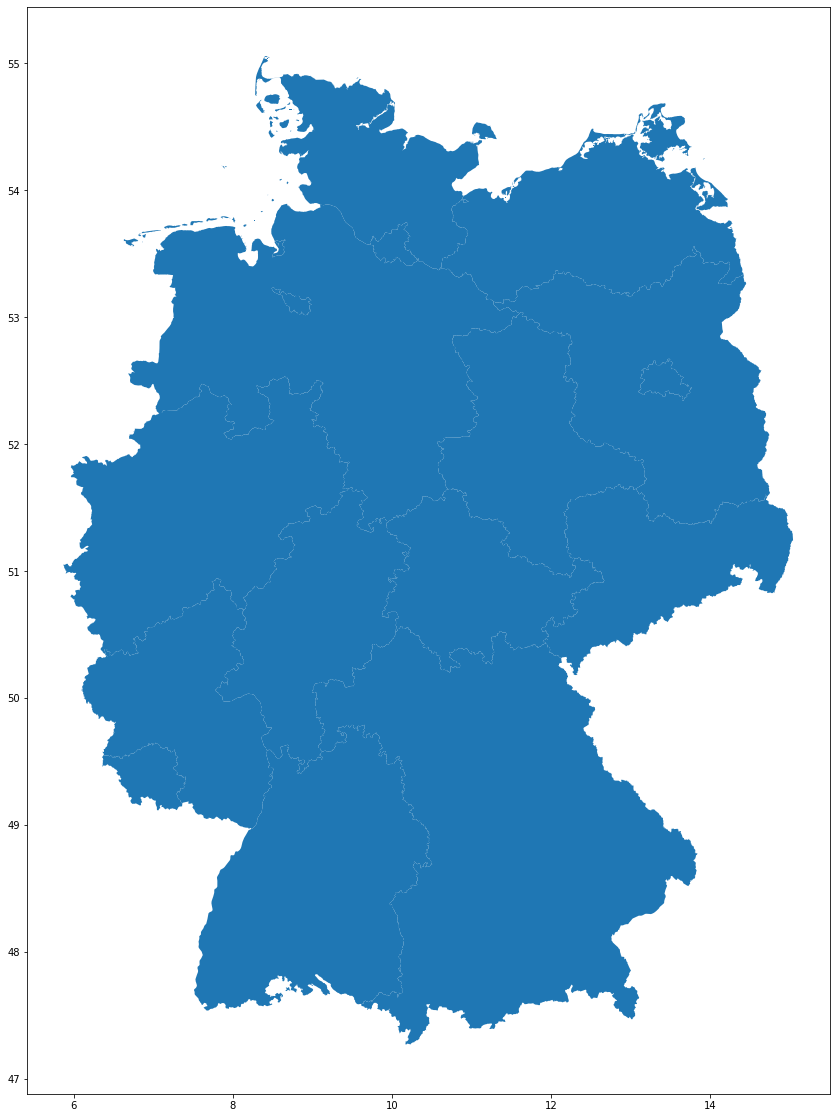

In [79]:
germany.plot(figsize = (20,20))

In [80]:
east_germany = ['Berlin','Brandenburg','Sachsen','Sachsen-Anhalt']
east_ger = germany.loc[germany['NAME_1'].isin(east_germany)]

In [81]:
east_ger

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
2,86,DEU,Germany,3,Berlin,Land,State,None,None,"POLYGON ((13.17789 52.39032, 13.16575 52.39050..."
3,86,DEU,Germany,4,Brandenburg,Land,State,None,None,"POLYGON ((13.87951 53.50107, 13.87927 53.49908..."
12,86,DEU,Germany,13,Sachsen-Anhalt,Land,State,None,Saxony-Anhalt,"POLYGON ((11.63251 53.01641, 11.63239 53.00897..."
13,86,DEU,Germany,14,Sachsen,Land,State,None,Saxony,"POLYGON ((12.87800 51.67270, 12.87185 51.66910..."


In [82]:
#colors for individual states
state_colors = {'Berlin': 'lightcoral', 'Brandenburg': 'lightblue', 'Sachsen-Anhalt' : 'khaki','Sachsen' : 'plum'}
cmap = plt.colors.ListedColormap([state_colors[b] for b in east_ger.NAME_1.unique()])


<AxesSubplot:>

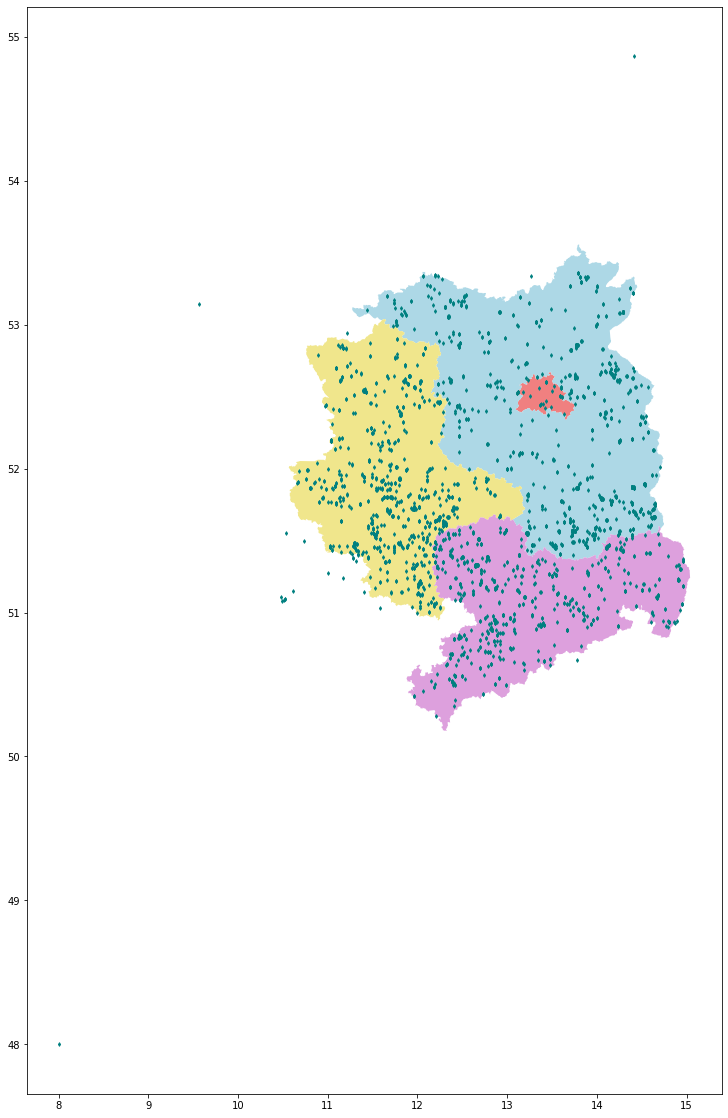

In [83]:
ax = east_ger.plot(cmap=cmap, figsize = (20,20))
#for i, geo in east_ger.centroid.iteritems():
   # ax.annotate(text=east_ger.NAME_1[i], xy=[geo.x, geo.y], color="black", ha='center', fontsize = 12, weight = 'bold')
gdf_pv.plot(ax=ax,marker = 'd', color = 'teal', markersize = 6)
  


In [84]:
#comparison where the gross power of the unit is less than installed capacity

x= gdf_pv[gdf_pv['Bruttoleistung der Einheit'] < gdf_pv['Installierte Leistung']]
x[['Bruttoleistung der Einheit','Nettonennleistung der Einheit','Installierte Leistung']]


,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Installierte Leistung
2046,"101,43",90,"104,43"
1249,"11174,6",10080,"11176,32"
2729,"0,8","0,6",8
778,"19433,4",15560,"19451,04"
2721,"0,6","0,6","0,66"
2493,"15281,995",12900,15282
2153,"5607,63",5130,"5607,66"
2006,"1968,66","989,13","3184,47"
83,"4685,905",4020,4686
941,"2841,81",2381,"9846,18"


In [85]:
total_pv_by_state = df.groupby(['Bundesland'])['Anzahl der Solar-Module'].sum()
total_pv_by_state.sort_values(ascending = False)[:10]

Bundesland
Brandenburg       17290866.0
Sachsen-Anhalt     7941555.0
Sachsen            5598843.0
Berlin               13880.0
Name: Anzahl der Solar-Module, dtype: float64

<AxesSubplot:title={'center':'Total number of PV units by state'}, xlabel='State', ylabel='Total number of PV units(log scale)'>

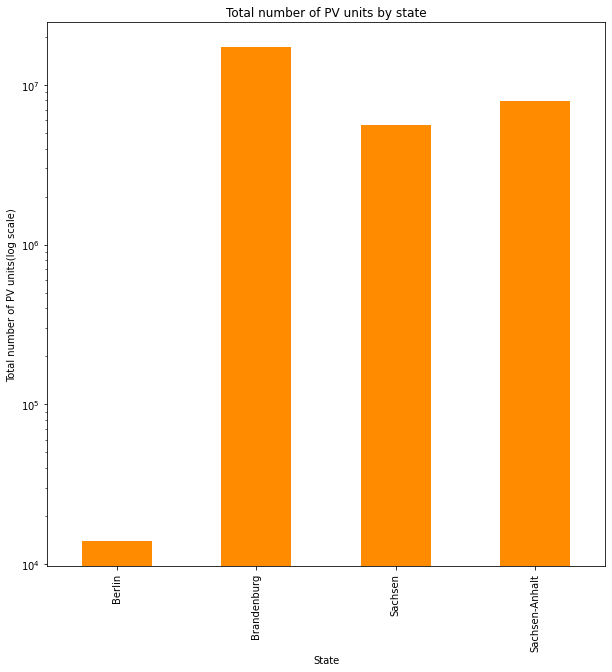

In [86]:
total_pv_by_state.plot(kind= 'bar', title = 'Total number of PV units by state', ylabel = 'Total number of PV units(log scale)', xlabel = 'State', figsize= (10,10), logy=True, color= 'darkorange')

<ipython-input-87-8d0ff08a5e2f>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (east_ger.area).plot(kind= "bar", x= 'State', y='Log of Area', figsize = (10,10), title = "Total area of the states")


<AxesSubplot:title={'center':'Total area of the states'}>

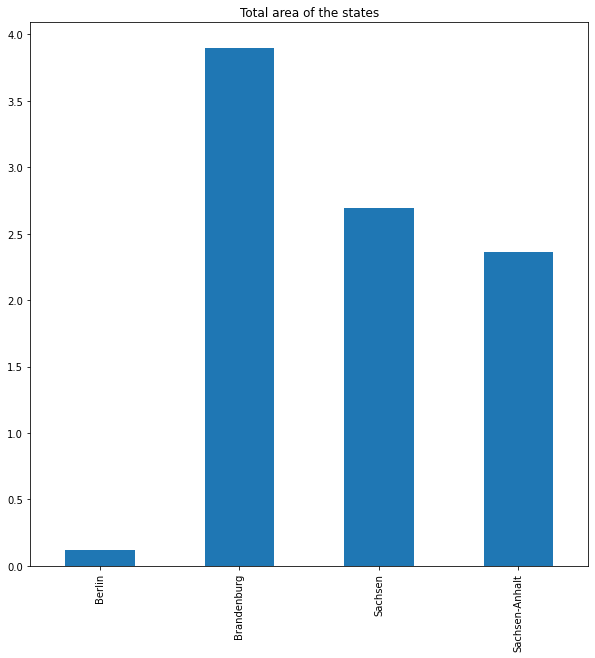

In [87]:
east_ger.index = east_germany
(east_ger.area).plot(kind= "bar", x= 'State', y='Log of Area', figsize = (10,10), title = "Total area of the states")


<AxesSubplot:title={'center':'10 Highest PV farms by state, place'}, xlabel='Bundesland,Ort'>

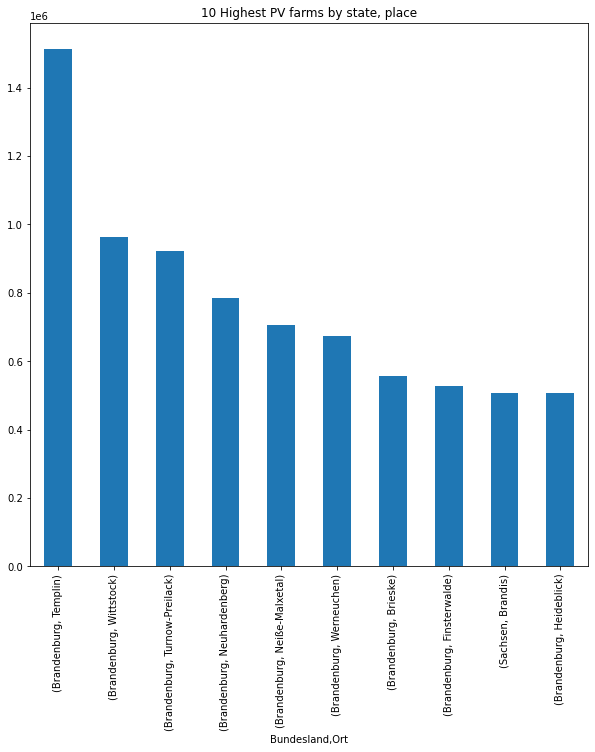

In [88]:
total_pv_by_ort = df.groupby(['Bundesland', 'Ort'])['Anzahl der Solar-Module'].sum()
total_pv_by_ort.sort_values(ascending = False)[:10].plot(kind= 'bar', figsize= (10,10), title = '10 Highest PV farms by state, place')

In [89]:
total_pv_by_pz = df.groupby(['Bundesland', 'Postleitzahl'])['Anzahl der Solar-Module'].sum()
total_pv_by_pz.sort_values(ascending= False)

Bundesland      Postleitzahl
Brandenburg     17268           1520606.0
                15320           1128468.0
                16909           1077765.0
                3185             949334.0
                16356            839461.0
                1968             819912.0
                15926            744139.0
                3159             731390.0
                16269            580671.0
Sachsen         4821             580024.0
Brandenburg     3238             573428.0
                14797            487200.0
Sachsen-Anhalt  6366             470865.0
Brandenburg     16227            431700.0
                16945            366541.0
Sachsen         2929             348216.0
                4828             317700.0
Brandenburg     15517            305067.0
                3058             296040.0
Sachsen-Anhalt  6188             294392.0
Brandenburg     4916             281682.0
                14772            269516.0
Sachsen         4509             257710.0
     

<AxesSubplot:title={'center':'Total number of PV units vs direction '}, xlabel='Hauptausrichtung der Solar-Module'>

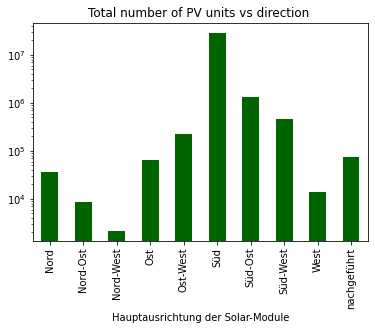

In [90]:
total_pv_by_direction = df.groupby(['Hauptausrichtung der Solar-Module'])['Anzahl der Solar-Module'].sum()
total_pv_by_direction.plot(kind= 'bar', logy= True, title = 'Total number of PV units vs direction ', y= "total number of pv units (in log scale)", color = 'darkgreen')